In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [2]:
plt.style.available

In [2]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# tes log_prob

In [12]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.7)]
# log_sigmaw2 = [np.log(6.)]
# log_a2 = [np.log(0.4)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1]).flatten()
theta.shape

(31,)

In [4]:
zfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_4.0.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mo

In [7]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['num'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [15]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=0,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=1,
    log_a=-1
)

scales = dict(
    rhoDM=0.15,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=3,
    log_a=2
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', 0.0, 1.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 1.0, 1.6094379124341003, 4.0),
 ('log_a', -1.0, -0.35667494393873245, 1.0)]

(31,)


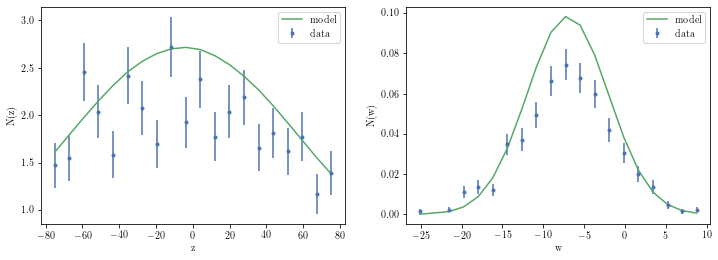

(61.189496965365166, 81.0872657056567)

In [16]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [17]:
dm.log_prob(theta, zdata, wdata, locs, scales)

(61.189496965365166, 81.0872657056567)

# mcmc

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import plot_corner, plot_chain, plot_fit, style, calculate_probs

In [19]:
style('seaborn-v0_8-deep')

In [20]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [1]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.7)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1]).flatten()
theta.shape

(31,)

In [21]:
ndim = 31
nwalkers = 2*ndim+2

In [22]:
zfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_4.0.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mo

In [23]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['num'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [67]:
locs = dict(
    rhoDM=-0.08,
    log_nu0=0.5,
    R=3.4E-3,
    zsun=-50,
    w0=-8,
    log_sigmaw=1.5,
    log_a=-1
)

scales = dict(
    rhoDM=0.2,
    log_nu0=0.5,
    R=0.6E-3,
    zsun=100,
    w0=3,
    log_sigmaw=0.5,
    log_a=0.7
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.08, 0.016, 0.12000000000000001),
 ('log_nu0', 0.5, 1.0, 1.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -8.0, -7.0, -5.0),
 ('log_sigmaw', 1.5, 1.6094379124341003, 2.0),
 ('log_a', -1.0, -0.35667494393873245, -0.30000000000000004)]

In [68]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=1)
p0.shape

(64, 31)

In [34]:
for p in p0:
    print(dm.log_prob(p, zdata, wdata, locs, scales))

(36.93996439911704, -2457.897591361196)
(50.047579407753126, -4803.3619650862465)
(54.43747730105724, -34.83231156285329)
(51.39304921460237, -1025.5774939736193)
(45.46746777975765, -519.5853778416966)
(47.74878703616147, -2644.1222162591685)
(47.86890553433059, -1866.124959878065)
(44.40931246919242, -951.8291270533443)
(49.657697163371445, -13076.882530056291)
(51.97233178036796, -11462.614570834561)
(44.556633472277674, -1443.3465675171963)
(43.79002395830494, -86.88181807683495)
(47.43405063989215, -7934.737411334955)
(47.3124910407346, -2237.986362190652)
(46.80471086245065, -662.8156682093372)
(45.20078797669634, -396.2765452840333)
(48.446227765444554, -2995.1828262344984)
(48.29487906433848, -274.11961697875523)
(50.34895022854789, -11892.622102954518)
(52.076498729817466, -6679.59116999784)
(50.53065995038136, -173.04019596641146)
(39.087856243528556, -4489.6717664405805)
(45.37209830043396, -1824.6820239852914)
(49.096071143789096, -40.78361154845128)
(50.215806894128676, -3

In [27]:
p0_flat = p0.reshape(-1, ndim)
dm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.71783396e+01, -4.69373395e+02, -4.22195056e+02],
       [ 5.07083237e+01, -2.88630318e+03, -2.83559486e+03],
       [ 5.20207492e+01, -7.65910900e+01, -2.45703408e+01],
       [ 4.58546866e+01, -1.59485571e+03, -1.54900102e+03],
       [ 4.65972606e+01, -7.31559980e+03, -7.26900254e+03],
       [ 4.28127640e+01, -3.33245222e+02, -2.90432458e+02],
       [ 4.73281246e+01, -1.66153542e+03, -1.61420730e+03],
       [ 5.20065745e+01, -6.12658550e+02, -5.60651976e+02],
       [ 4.41398619e+01, -8.37522938e+02, -7.93383076e+02],
       [ 4.50981430e+01, -1.07741911e+01,  3.43239519e+01],
       [ 4.03433224e+01, -3.95043924e+03, -3.91009592e+03],
       [ 5.01076921e+01, -1.02442606e+03, -9.74318372e+02],
       [ 5.61247992e+01, -2.40306030e+03, -2.34693550e+03],
       [ 5.50865997e+01, -1.45494302e+04, -1.44943436e+04],
       [ 5.27627861e+01, -5.96424901e+01, -6.87970404e+00],
       [ 4.11864542e+01, -6.04735718e+02, -5.63549264e+02],
       [ 4.44545833e+01, -1.28079296e+03

(31,)


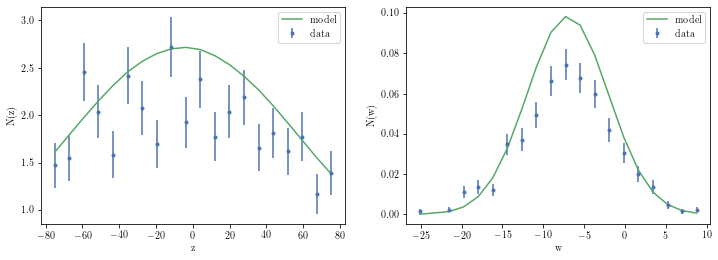

(61.189496965365166, 81.0872657056567)

In [28]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [69]:
t0 = time()
chain = dm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

2.513339042663574 s


(500, 64, 31)

In [36]:
calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   36.9399644 , -2494.83755576, -2457.89759136],
       [   53.74556249, -2581.82520309, -2528.0796406 ],
       [   54.4374773 ,   -89.26978886,   -34.83231156],
       ...,
       [   54.01193038,    75.77123789,   129.78316827],
       [   42.72889125,    72.86893092,   115.59782217],
       [   49.35937076,    76.22232761,   125.58169836]])

(500, 64, 8)


100%|██████████| 8/8 [00:00<00:00, 46.08it/s]


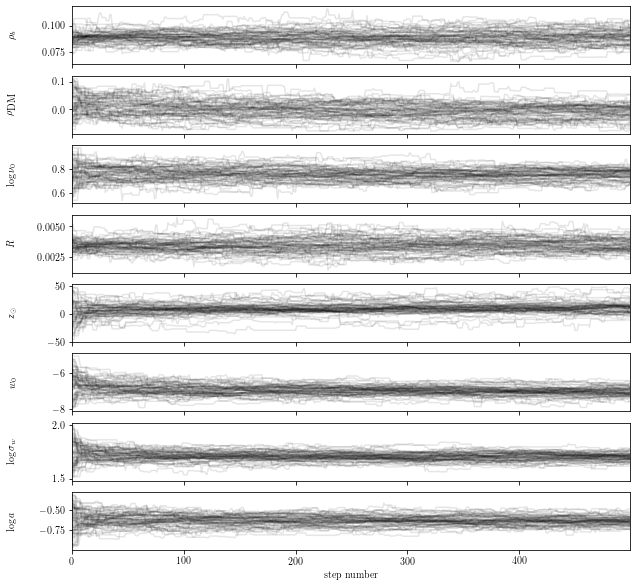

In [70]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_chain(params, labels, figsize=(10,10))

In [73]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

9.310915470123291 s


(2000, 64, 31)

(2000, 64, 8)


100%|██████████| 8/8 [00:00<00:00, 24.34it/s]


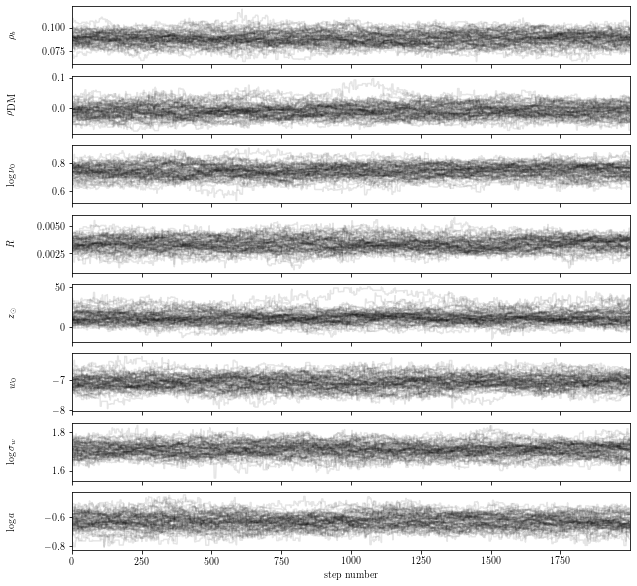

In [74]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_chain(params, labels, figsize=(10,10))

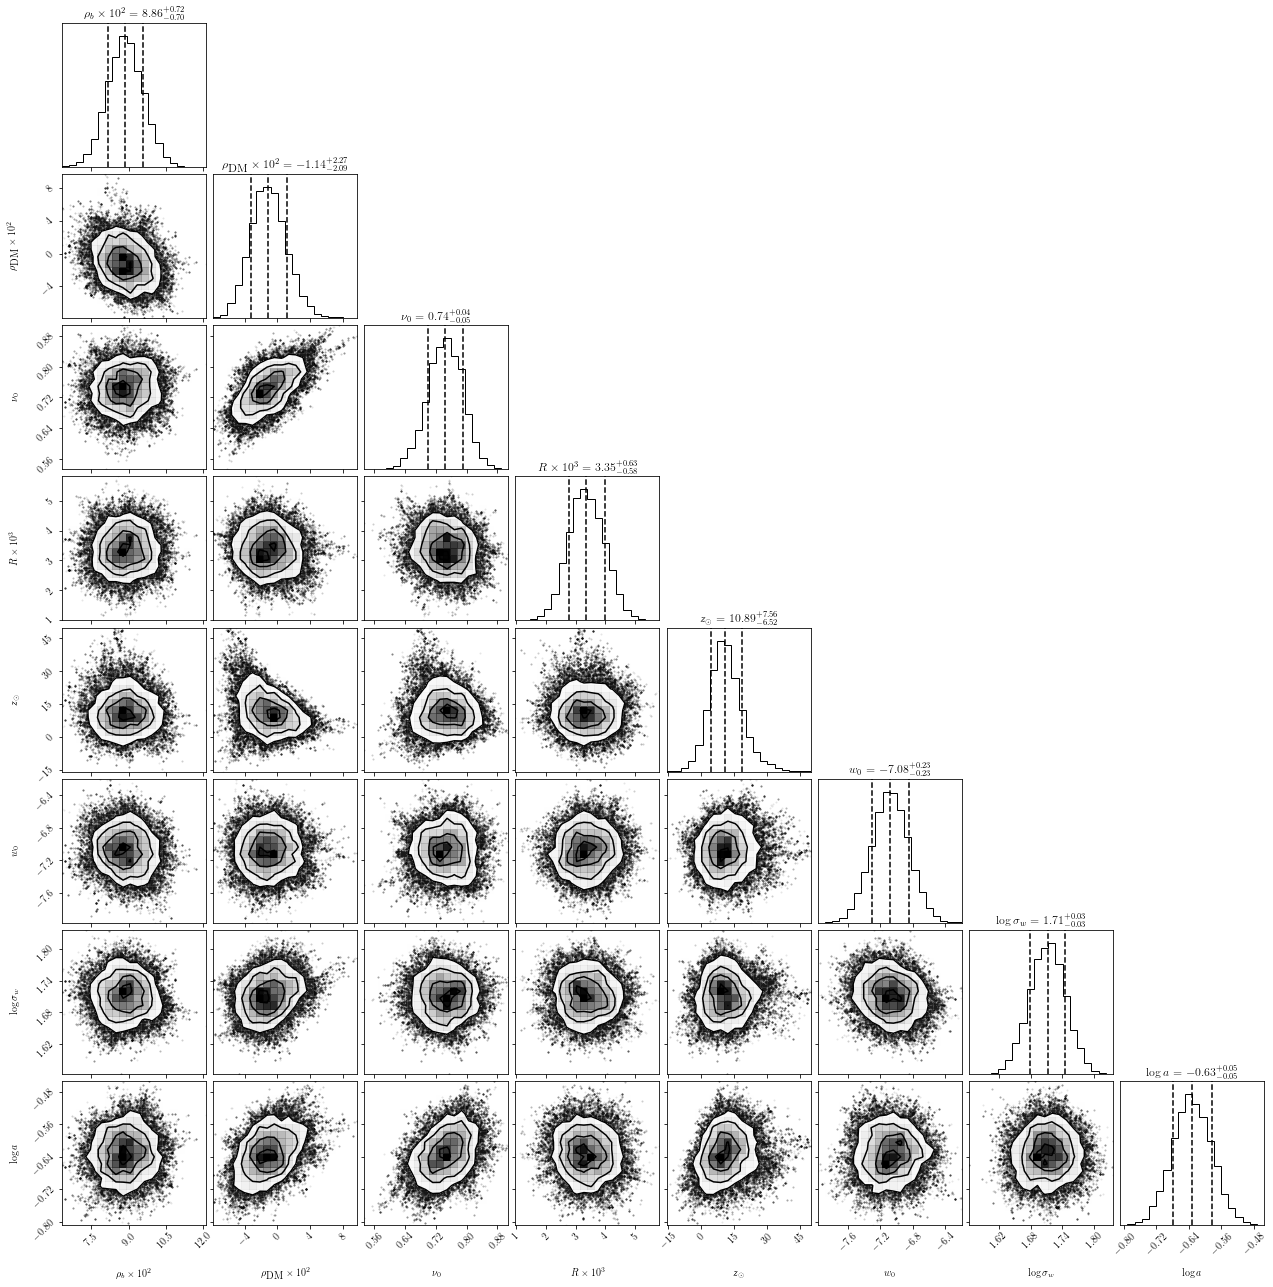

In [75]:
rhob = chain[:, :, :12].sum(axis=2).T/1E-2
rhoDM = chain[:, :, 24].T/1E-2
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T/1E-3
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
plot_corner(params, labels)

# fit

(128000, 31)


100%|██████████| 50000/50000 [00:27<00:00, 1848.55it/s]


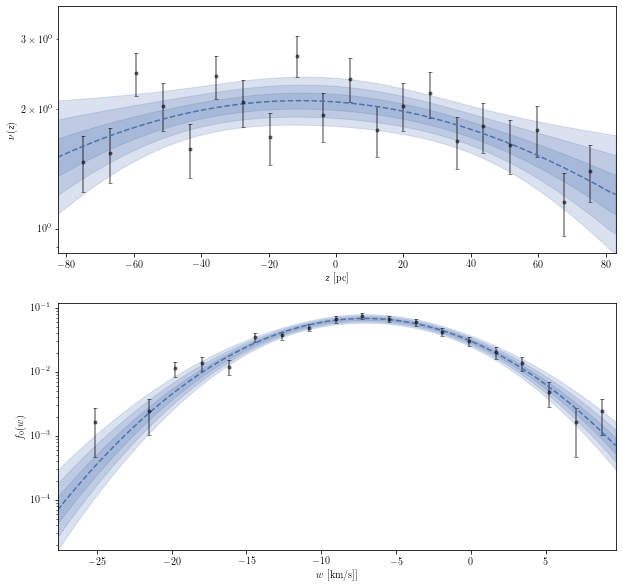

In [76]:
plot_fit(dm, zdata, wdata, chain, ndim)

In [27]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales)

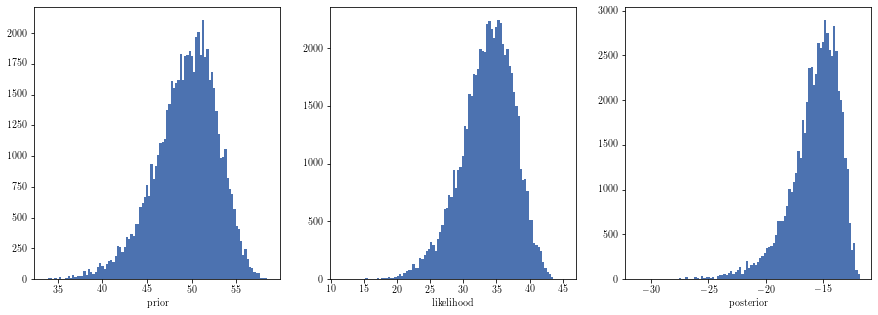

45.30291153660018

In [28]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# 2 comp

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import plot_corner, plot_chain, plot_fit, style, calculate_probs

In [77]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# tes log_prob

In [111]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [0.7]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.4)]
log_sigmaw2 = [np.log(6.)]
log_a2 = [np.log(0.3)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [83]:
zfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_4.0.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mo

In [112]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['num'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [113]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=0,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw1=1,
    log_a1=-2,
    log_sigmaw2=1,
    log_a2=-2,
)

scales = dict(
    rhoDM=0.15,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw1=1,
    log_a1=2,
    log_sigmaw2=1,
    log_a2=2
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', 0.0, 0.7, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 1.0, 1.6094379124341003, 2.0),
 ('log_a1', -2.0, -0.916290731874155, 0.0),
 ('log_sigmaw2', 1.0, 1.791759469228055, 2.0),
 ('log_a2', -2.0, -1.2039728043259361, 0.0)]

(33,)


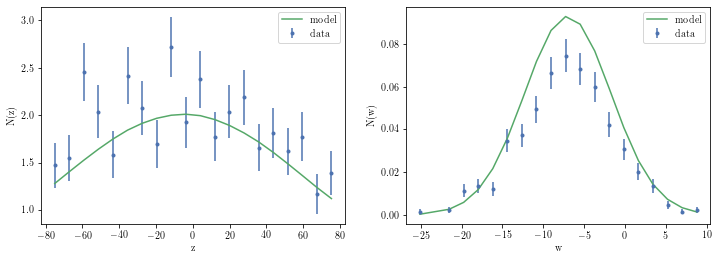

(59.39773749613711, 100.895813368318)

In [91]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

# mcmc

In [115]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import plot_corner, plot_chain, plot_fit, style, calculate_probs

In [116]:
zfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_4.0.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mo

In [117]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['z'].to_numpy()
znum = zdata['num'].to_numpy()
zerr = zdata['err'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [118]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [0.7]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.4)]
log_sigmaw2 = [np.log(6.)]
log_a2 = [np.log(0.3)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [119]:
ndim = 33
nwalkers = 2*ndim+2

In [132]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=0,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw1=1,
    log_a1=-2,
    log_sigmaw2=1,
    log_a2=-2,
)

scales = dict(
    rhoDM=0.15,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw1=1,
    log_a1=2,
    log_sigmaw2=1,
    log_a2=2
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', 0.0, 0.7, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 1.0, 1.6094379124341003, 2.0),
 ('log_a1', -2.0, -0.916290731874155, 0.0),
 ('log_sigmaw2', 1.0, 1.791759469228055, 2.0),
 ('log_a2', -2.0, -1.2039728043259361, 0.0)]

In [133]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [101]:
for p in p0:
    print(dm.log_prob(p, zdata, wdata, locs, scales))

(42.23111768046081, -3335.859681374816)
(41.35941208749281, -939.002488808986)
(43.57936876316458, -88.29613249824098)
(48.620412659344886, 48.193092533969356)
(43.382600763287535, -4180.664400281415)
(42.08412795803469, -172.22576738366308)
(47.63058981384007, -66.00713329407711)
(37.033066853335235, -78.10646699508996)
(49.3846037816923, -821.7093580197178)
(50.44081246440657, -352.45787422987064)
(49.815486328564226, -3432.7518013201534)
(46.63219715193192, -84.26329204947216)
(51.361700903560546, -1872.0749687676598)
(48.30191932122294, 2.4079277379825896)
(52.64647406896412, -264.65435177857194)
(35.14878624798069, -1798.629335104416)
(47.17289728241733, -1753.9042891688591)
(42.87596110402968, -406.9135062151287)
(48.75205491039882, -637.2063900305532)
(41.26689030174045, -1027.7428233516798)
(52.49197125307376, -523.5796707623307)
(50.639966792273576, -871.1697640926207)
(46.5976552220233, -139.6370372270376)
(49.3417161428032, -2952.3038972761387)
(39.03493750202804, -3964.5495

In [102]:
p0_flat = p0.reshape(-1, ndim)
dm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.22311177e+01, -3.37809080e+03, -3.33585968e+03],
       [ 4.13594121e+01, -9.80361901e+02, -9.39002489e+02],
       [ 4.35793688e+01, -1.31875501e+02, -8.82961325e+01],
       [ 4.86204127e+01, -4.27320125e-01,  4.81930925e+01],
       [ 4.33826008e+01, -4.22404700e+03, -4.18066440e+03],
       [ 4.20841280e+01, -2.14309895e+02, -1.72225767e+02],
       [ 4.76305898e+01, -1.13637723e+02, -6.60071333e+01],
       [ 3.70330669e+01, -1.15139534e+02, -7.81064670e+01],
       [ 4.93846038e+01, -8.71093962e+02, -8.21709358e+02],
       [ 5.04408125e+01, -4.02898687e+02, -3.52457874e+02],
       [ 4.98154863e+01, -3.48256729e+03, -3.43275180e+03],
       [ 4.66321972e+01, -1.30895489e+02, -8.42632920e+01],
       [ 5.13617009e+01, -1.92343667e+03, -1.87207497e+03],
       [ 4.83019193e+01, -4.58939916e+01,  2.40792774e+00],
       [ 5.26464741e+01, -3.17300826e+02, -2.64654352e+02],
       [ 3.51487862e+01, -1.83377812e+03, -1.79862934e+03],
       [ 4.71728973e+01, -1.80107719e+03

(33,)


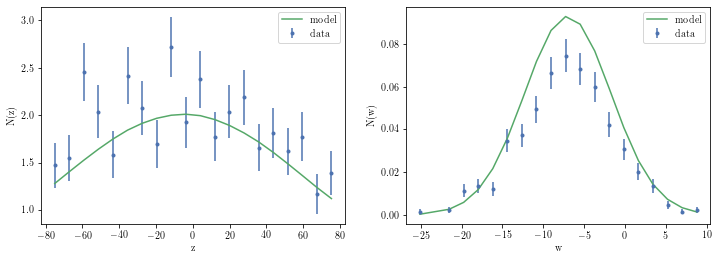

(59.39773749613711, 100.895813368318)

In [103]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [134]:
t0 = time()
chain = dm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

2.971264600753784 s


(500, 68, 33)

In [105]:
calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.55635955, -3131.57996387, -3087.02360432],
       [   51.67436276,  -566.04738634,  -514.37302358],
       [   41.87333669,  -125.75217199,   -83.8788353 ],
       ...,
       [   47.32173177,    70.62957261,   117.95130439],
       [   47.94989414,    73.98587744,   121.93577157],
       [   47.23906648,    69.90703555,   117.14610203]])

(500, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 43.11it/s]


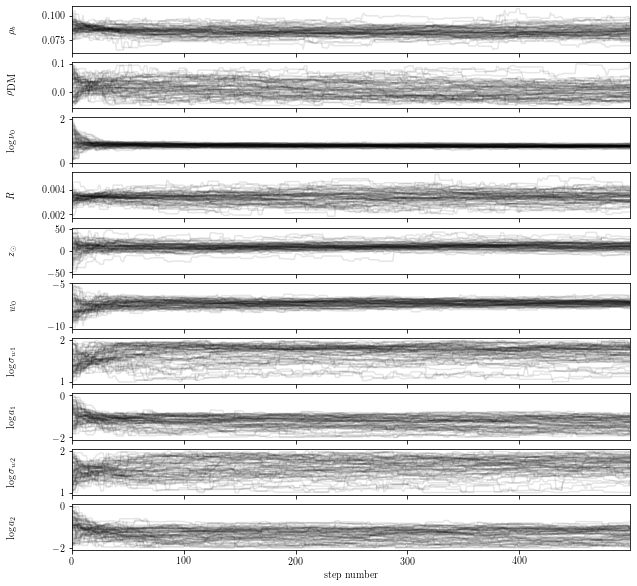

In [135]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_chain(params, labels, figsize=(10,10))

In [136]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

10.988486289978027 s


(2000, 68, 33)

(2000, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 17.57it/s]


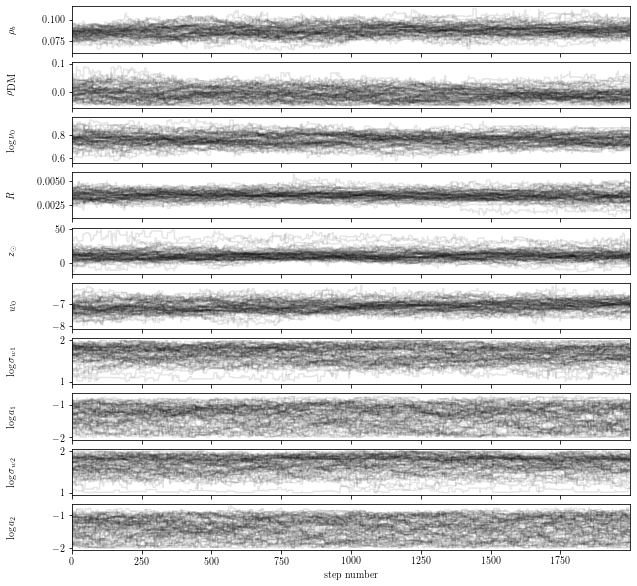

In [137]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_chain(params, labels, figsize=(10,10))

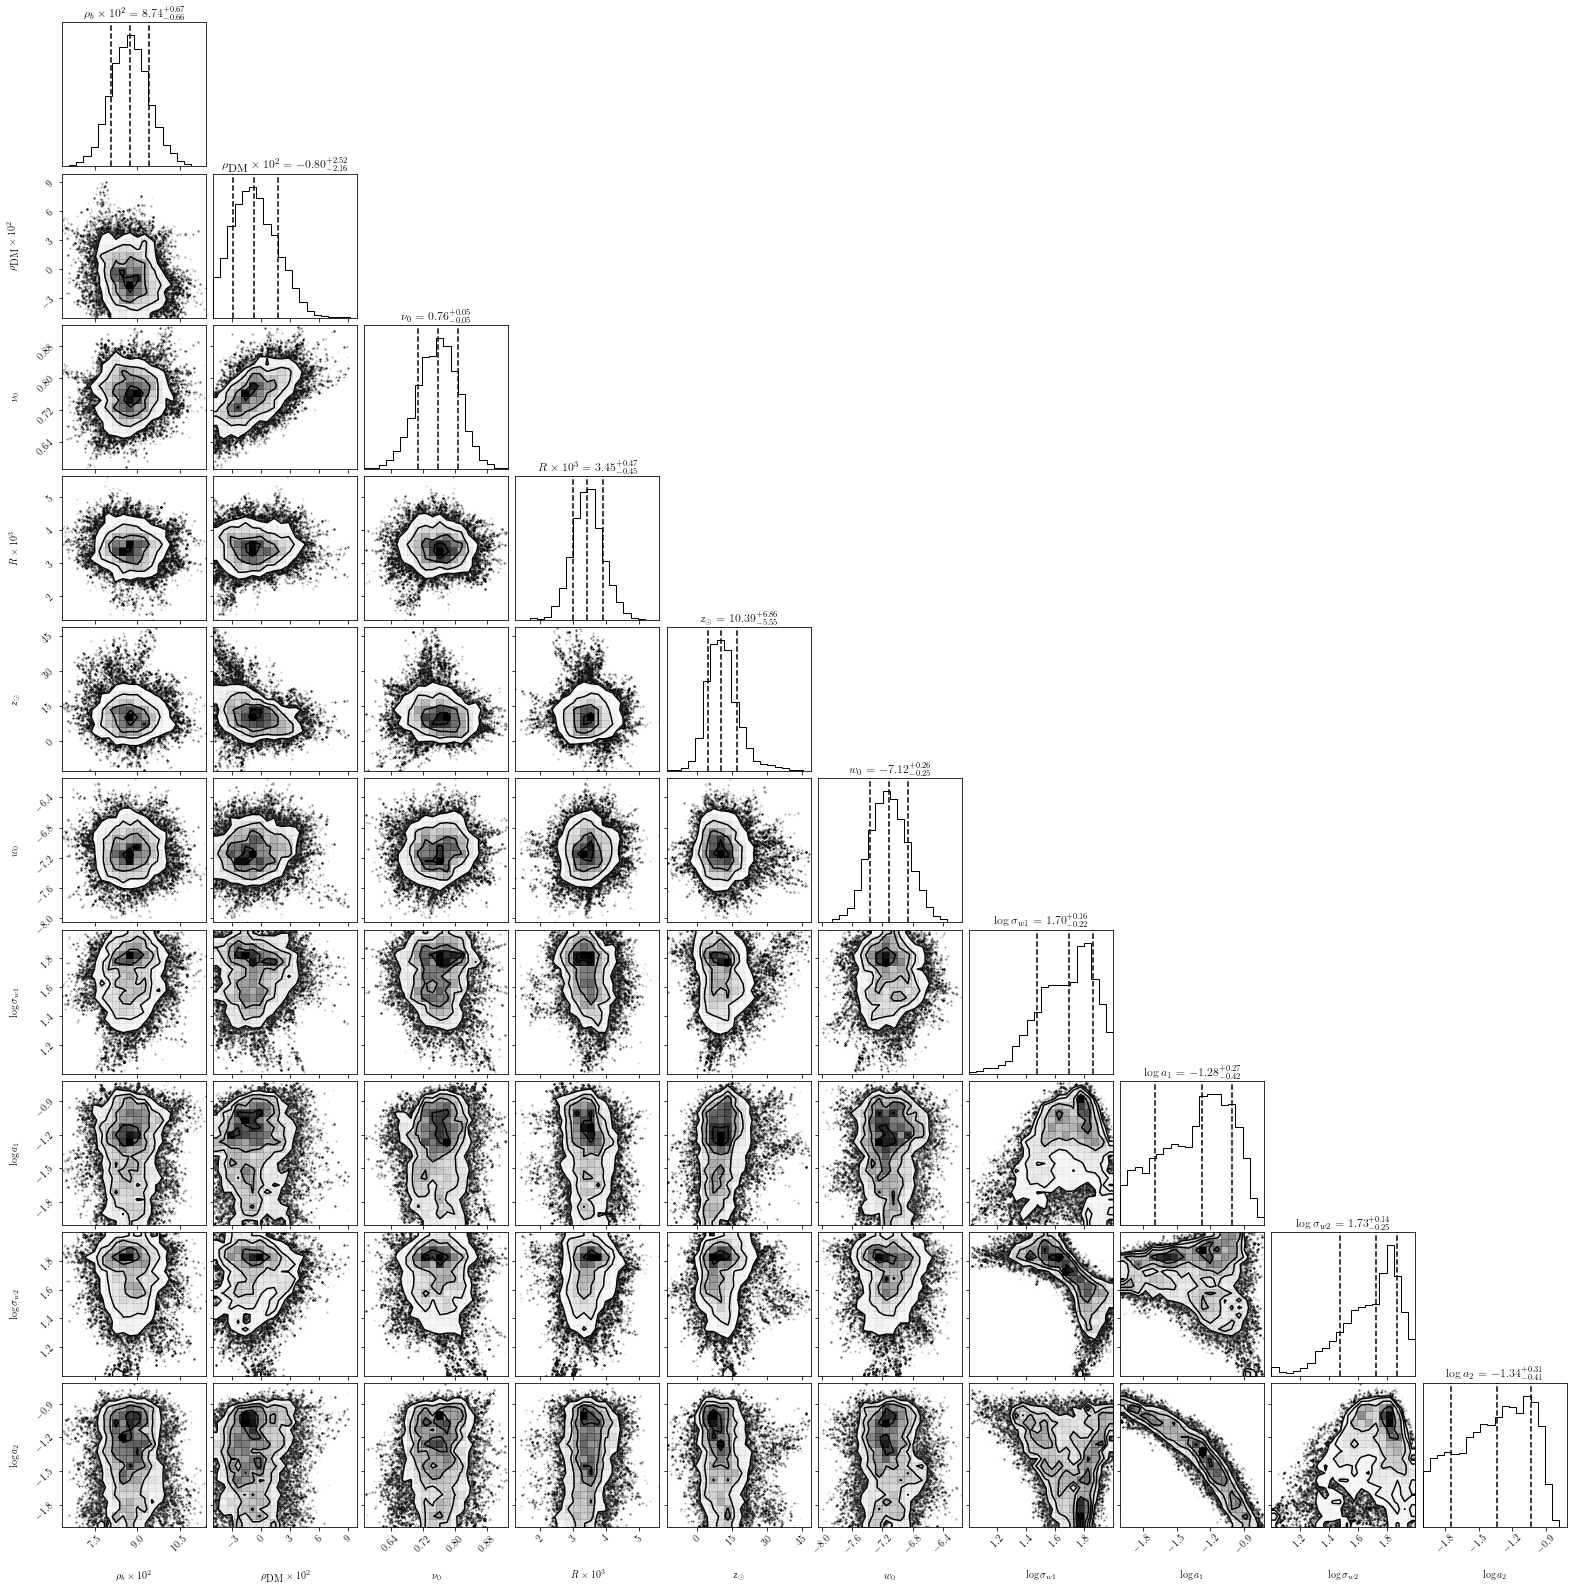

In [138]:
rhob = chain[:, :, :12].sum(axis=2).T/1E-2
rhoDM = chain[:, :, 24].T/1E-2
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T/1E-3
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_corner(params, labels)

# fit

(136000, 33)


100%|██████████| 50000/50000 [00:28<00:00, 1775.89it/s]


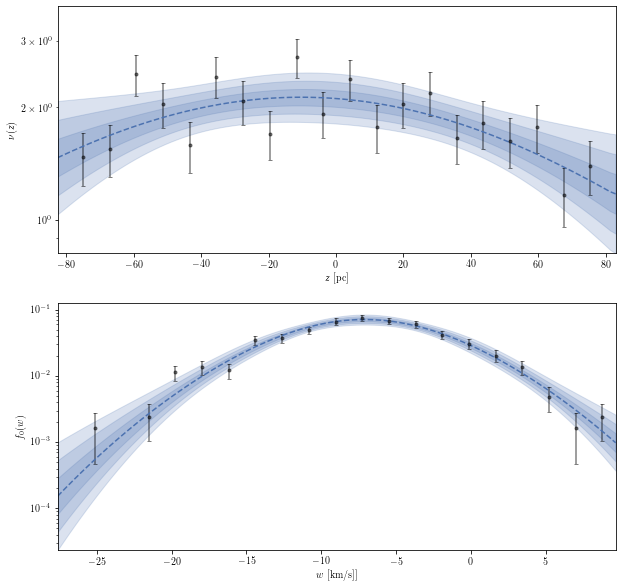

In [139]:
plot_fit(dm, zdata, wdata, chain, ndim)

In [ ]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales)

In [ ]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()